# Explore here

In [2]:
import numpy as np, random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1- EPLORACION DE DATOS: A)EXTRACCION DE DATOS, B) CATEGORIZACION DE DATOS C)LIMPIEZA DE DATOS.


In [3]:
#1.A) Obtener dataframe de datos a partir del csv.
#https://docs.python.org/3/library/csv.html csv related.
#rawdata as rd
rd= "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv" 
#dataframe rawdata as df_rd
df_rd = pd.read_csv(rd)
df_rd.to_csv('/workspaces/EDA_ML.LogisticRegresion/data/raw/df_rd.csv')



In [4]:
#1.B) CATEGORIZACION DE DATOS.
#INFO y Head para ver tipos de variables. Tambien con la extension "DataWrangler podemos ver archivos csv y dataframes"
df_rd.head(3)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."


In [5]:
#1.B) El dataframe no tiene el formato deseado , observamos que los identificadores de columna estan separados por puntos y coma,
#filtramos el csv raw para darle formato y sobreescribimos nuestro dataframe
df_rd = pd.read_csv(rd, sep=";")
df_rd.to_csv('/workspaces/EDA_ML.LogisticRegresion/data/raw/df_rd.csv')
df_rd.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#1.B) ClassDatos
#Utilizamos una función para separar variables numericas y categoricas en un dataframe.
import pandas as pd
import numpy as np
import pandas as pd

def vartype(df):


    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    
    df_tipos = pd.DataFrame({'Tipo': ['Numérica']*len(num_cols) + ['Categórica']*len(cat_cols),
                            'Columna': num_cols + cat_cols})
    total_num = len(num_cols)
    total_cat = len(cat_cols)
    total_general = total_num + total_cat
    # Crear una lista de diccionarios para las nuevas filas
    new_rows = [
        {'Tipo': 'Total Numérico', 'Columna': total_num},
        {'Tipo': 'Total Categórico', 'Columna': total_cat},
        {'Tipo': 'Total General', 'Columna': total_general},
    ]

    
    df_tipos = pd.concat([df_tipos, pd.DataFrame(new_rows)], ignore_index=True)
    
    return df_tipos

df_rd_vars= vartype(df_rd)
print(df_rd_vars)



                Tipo         Columna
0           Numérica             age
1           Numérica        duration
2           Numérica        campaign
3           Numérica           pdays
4           Numérica        previous
5           Numérica    emp.var.rate
6           Numérica  cons.price.idx
7           Numérica   cons.conf.idx
8           Numérica       euribor3m
9           Numérica     nr.employed
10        Categórica             job
11        Categórica         marital
12        Categórica       education
13        Categórica         default
14        Categórica         housing
15        Categórica            loan
16        Categórica         contact
17        Categórica           month
18        Categórica     day_of_week
19        Categórica        poutcome
20        Categórica               y
21    Total Numérico              10
22  Total Categórico              11
23     Total General              21


In [7]:
#1.C) Limpieza de datos
#Ahora buscamos datos nulos y duplicados.
print(df_rd.duplicated(),'\n',df_rd.isnull().sum())
#Observamos que hay datos duplicados pero no nulos. Modificaremos el dataframe sin duplicados.




0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool 
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
#1.C) Limpieza de datos
df_rd = df_rd.drop_duplicates().reset_index(drop = True)
df_rd.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41171    False
41172    False
41173    False
41174    False
41175    False
Length: 41176, dtype: bool

In [9]:
#1.C) Limpieza de datos
df_rd.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


NUESTRA VARIABLE TARGET, NOS LA HA DADO NUESTRO CLIENTE, ES LA AFIRMACION DE QUE UN CLIENTE QUIERA CONTRATAR UNA CUENTA DE DEPOSITOS A
LARGO PLAZO, VARIABLE ''y'' en el DATAFRAME, la ''y'' del dataframe nos indica, que de los clientes ya existentes de este banco,
quienes tienen ya una cuenta de ahorro contratada (deposito a largo plazo).
EL OBJETIVO: Entrenar una clasificacion de regresion logistica con los datos ya existentes, poder ahorrar tiempo y asegurarnos
en que la busqueda del perfil del cliente sea exacta. Buscaremos relaciones positivas y excluiremos perfiles con relaciones negativas, dentro de nuestro dataframe e intentaremos conseguir un modelo eficiente para esta tarea.


PASO 2) ANÁLISIS UNIVARIABLE.

In [10]:
#2.1) VARIABLES UNIVARIADAS CATEGORICAS.
print(df_rd_vars)

                Tipo         Columna
0           Numérica             age
1           Numérica        duration
2           Numérica        campaign
3           Numérica           pdays
4           Numérica        previous
5           Numérica    emp.var.rate
6           Numérica  cons.price.idx
7           Numérica   cons.conf.idx
8           Numérica       euribor3m
9           Numérica     nr.employed
10        Categórica             job
11        Categórica         marital
12        Categórica       education
13        Categórica         default
14        Categórica         housing
15        Categórica            loan
16        Categórica         contact
17        Categórica           month
18        Categórica     day_of_week
19        Categórica        poutcome
20        Categórica               y
21    Total Numérico              10
22  Total Categórico              11
23     Total General              21


/tmp/ipykernel_72049/2031491579.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2031491579.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2031491579.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2031491579.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


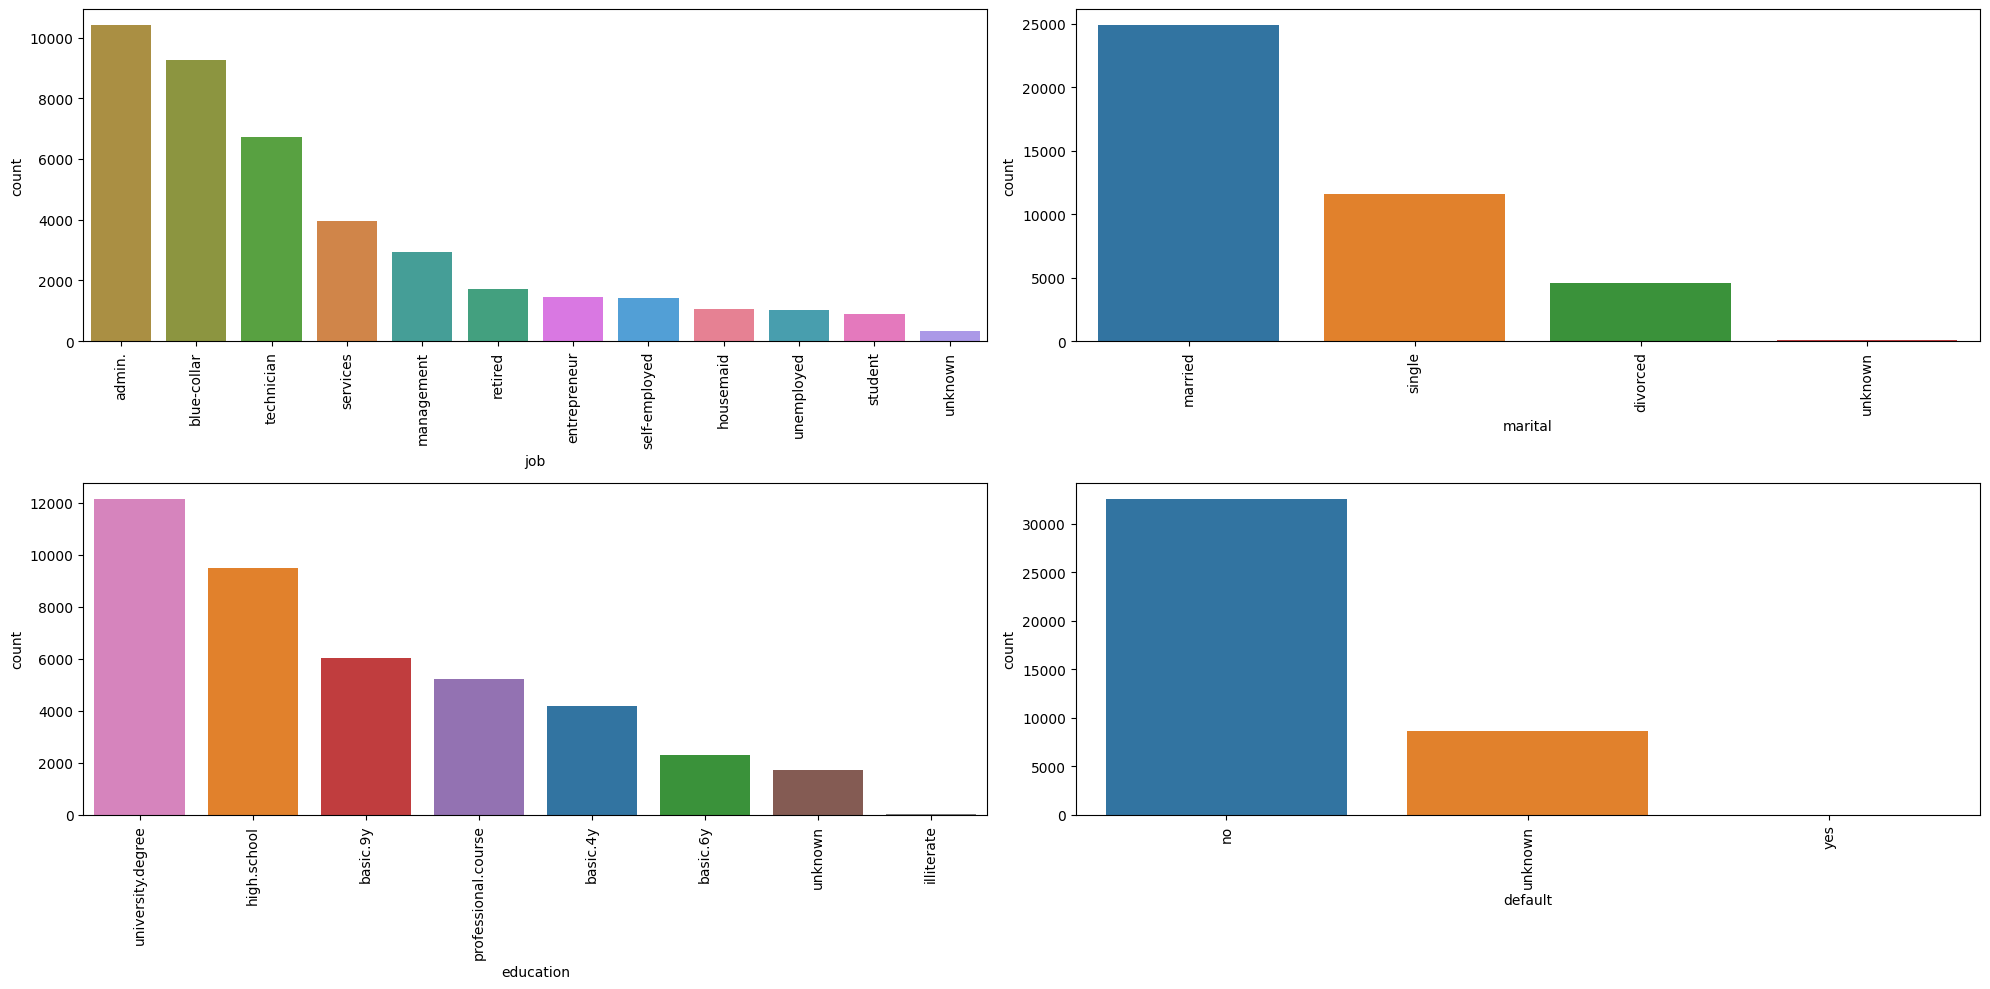

/tmp/ipykernel_72049/2031491579.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2031491579.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2031491579.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2031491579.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


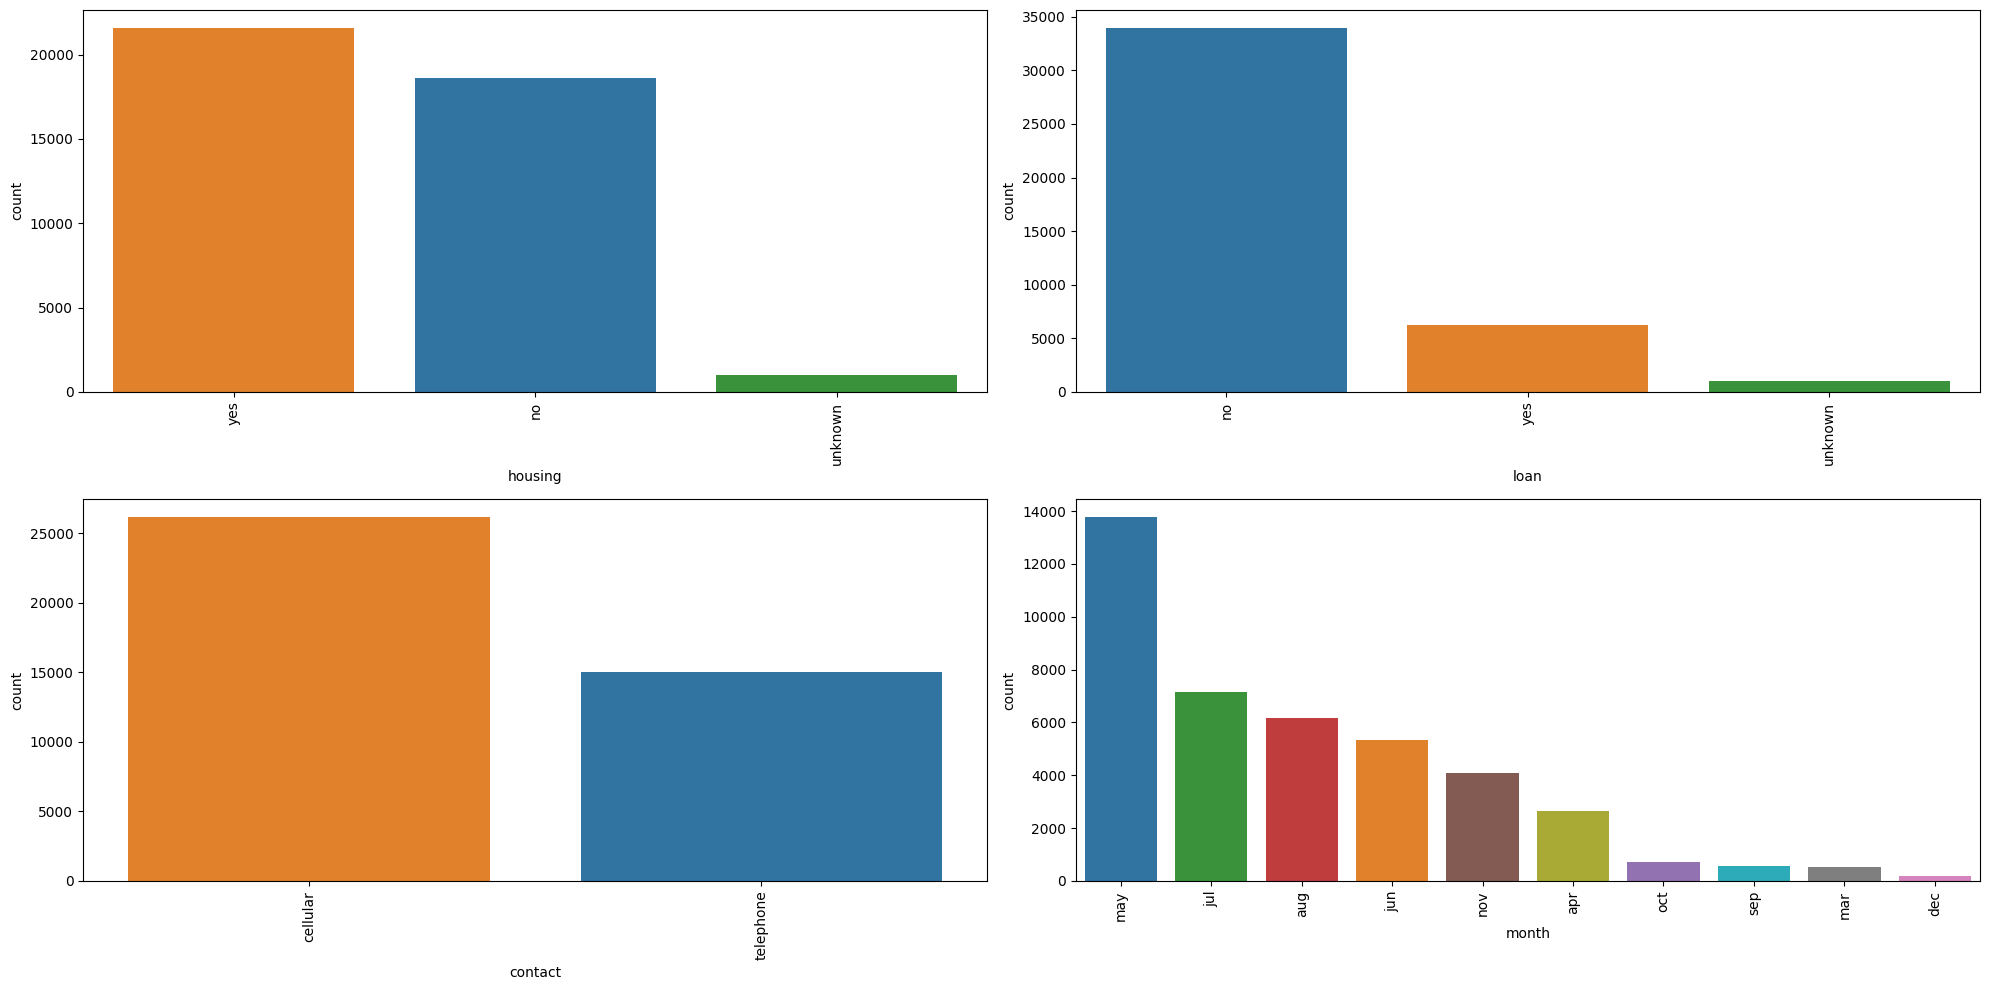

/tmp/ipykernel_72049/2031491579.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2031491579.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2031491579.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)


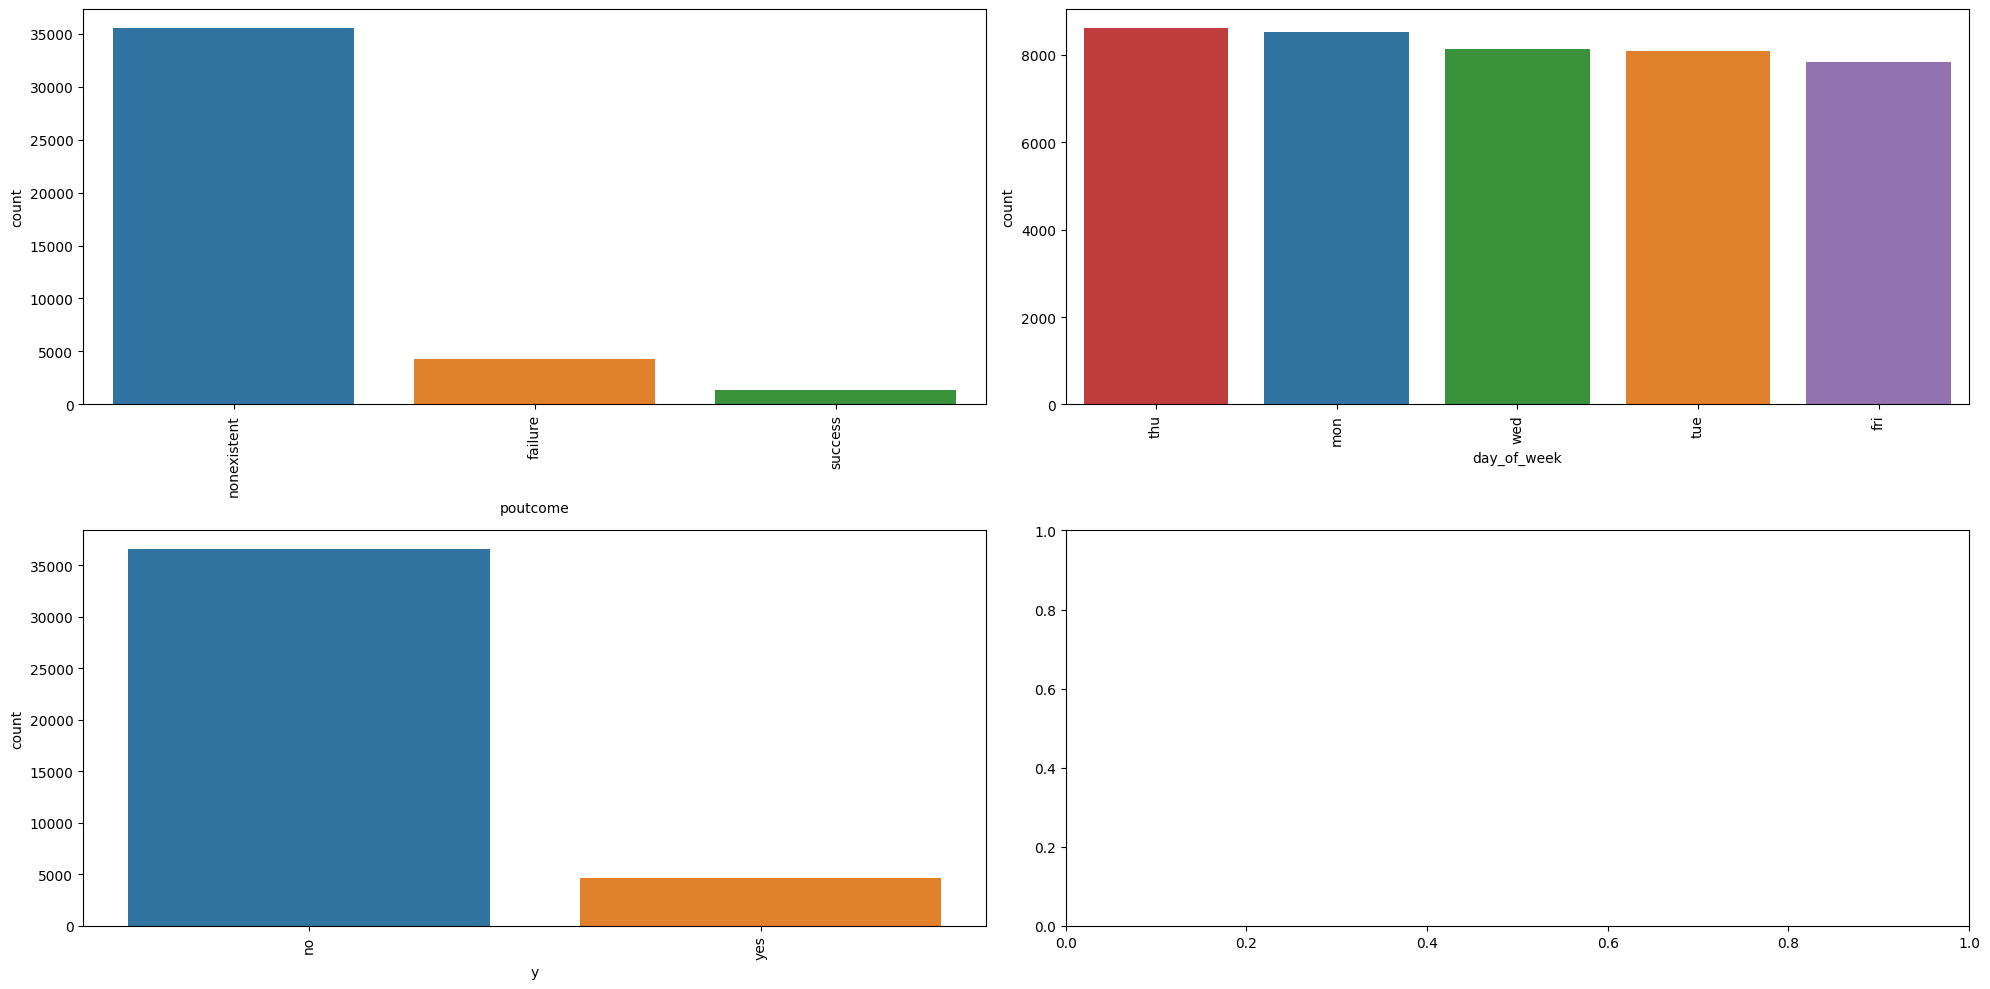

In [11]:
#VARIABLES CATEGÓRICAS.
import matplotlib.pyplot as plt
import seaborn as sns
#graficaremos de 4 en 4
#1grupo: job marital education default
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(ax=axs[0, 0],
              data=df_rd,
              x="job",
              hue="job",
              order=df_rd['job'].sort_values().value_counts().index)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[0, 1],
              data=df_rd,
              x="marital",
              hue="marital",
              order=df_rd['marital'].sort_values().value_counts().index)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 0],
              data=df_rd,
              x="education",
              hue="education",
              order=df_rd['education'].sort_values().value_counts().index)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 1],
              data=df_rd,
              x="default",
              hue="default",
              order=df_rd['default'].sort_values().value_counts().index)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#grupo: housing loan contact month
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(ax=axs[0, 0],
              data=df_rd,
              x="housing",
              hue="housing",
              order=df_rd['housing'].sort_values().value_counts().index)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[0, 1],
              data=df_rd,
              x="loan",
              hue="loan",
              order=df_rd['loan'].sort_values().value_counts().index)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 0],
              data=df_rd,
              x="contact",
              hue="contact",
              order=df_rd['contact'].sort_values().value_counts().index)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 1],
              data=df_rd,
              x="month",
              hue="month",
              order=df_rd['month'].sort_values().value_counts().index)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()
#3grupo poutcome day_of_week  'y'
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(ax=axs[0, 0],
              data=df_rd,
              x="poutcome",
              hue="poutcome",
              order=df_rd['poutcome'].sort_values().value_counts().index)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[0, 1],
              data=df_rd,
              x="day_of_week",
              hue="day_of_week",
              order=df_rd['day_of_week'].sort_values().value_counts().index)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 0],
              data=df_rd,
              x="y",
              hue="y",
              order=df_rd['y'].sort_values().value_counts().index)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [12]:
print(df_rd_vars[df_rd_vars['Tipo'] == 'Categórica']['Columna'].unique())

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']


PRIMERO DE TODO TRADUCIMOS LAS VARIABLES CATEGORICAS AL ESPAÑOL:
    'job': 'trabajo',
    'marital': 'estado_civil',
    'education': 'educacion',
    'default': 'impago',
    'housing': 'vivienda',
    'loan': 'prestamo',
    'contact': 'contacto',
    'month': 'mes',
    'day_of_week': 'dia_semana',
    'poutcome': 'resultado_anterior',
    'y': 'variable_objetivo'  (true o false) personas con cuenta de ahorros/depositos a largo plazo.
CONCLUSIONES: Estos son los datos de los clientes dados de alta, la variable month  es mas relevante que  day_of_week la cual su distribucion se mantiene homogenea durante todos los dias de la semana.
puedo observar una distribucion pareja en muchas de las variables, incluido patrones similares con la variable target. A priori mantendre todas la variables,
hasta observar la correlacion multivariable, pero estoy convencido de que mas de 1 variable dan informacion redundante, por lo que en nuestra clasificacion,
podremos obviarlas para el calculo en los modelos.


In [15]:
#2.2) VARIABLES UNIVARIADAS NUMERICAS.
print(df_rd_vars[df_rd_vars['Tipo'] == 'Numérica']['Columna'].unique())
#Preparo los datos para graficar:
maxage= df_rd['age'].max()
maxdur= df_rd['duration'].max()
maxcam= df_rd['campaign'].max()
maxpday= df_rd['pdays'].max()
maxprev= df_rd['previous'].max()
maxconspr= df_rd['cons.price.idx'].max()
maxcons= df_rd['cons.conf.idx'].max()
maxeur= df_rd['euribor3m'].max()
maxemp= df_rd['nr.employed'].max()

['age' 'duration' 'campaign' 'pdays' 'previous' 'emp.var.rate'
 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


/tmp/ipykernel_72049/2511921621.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


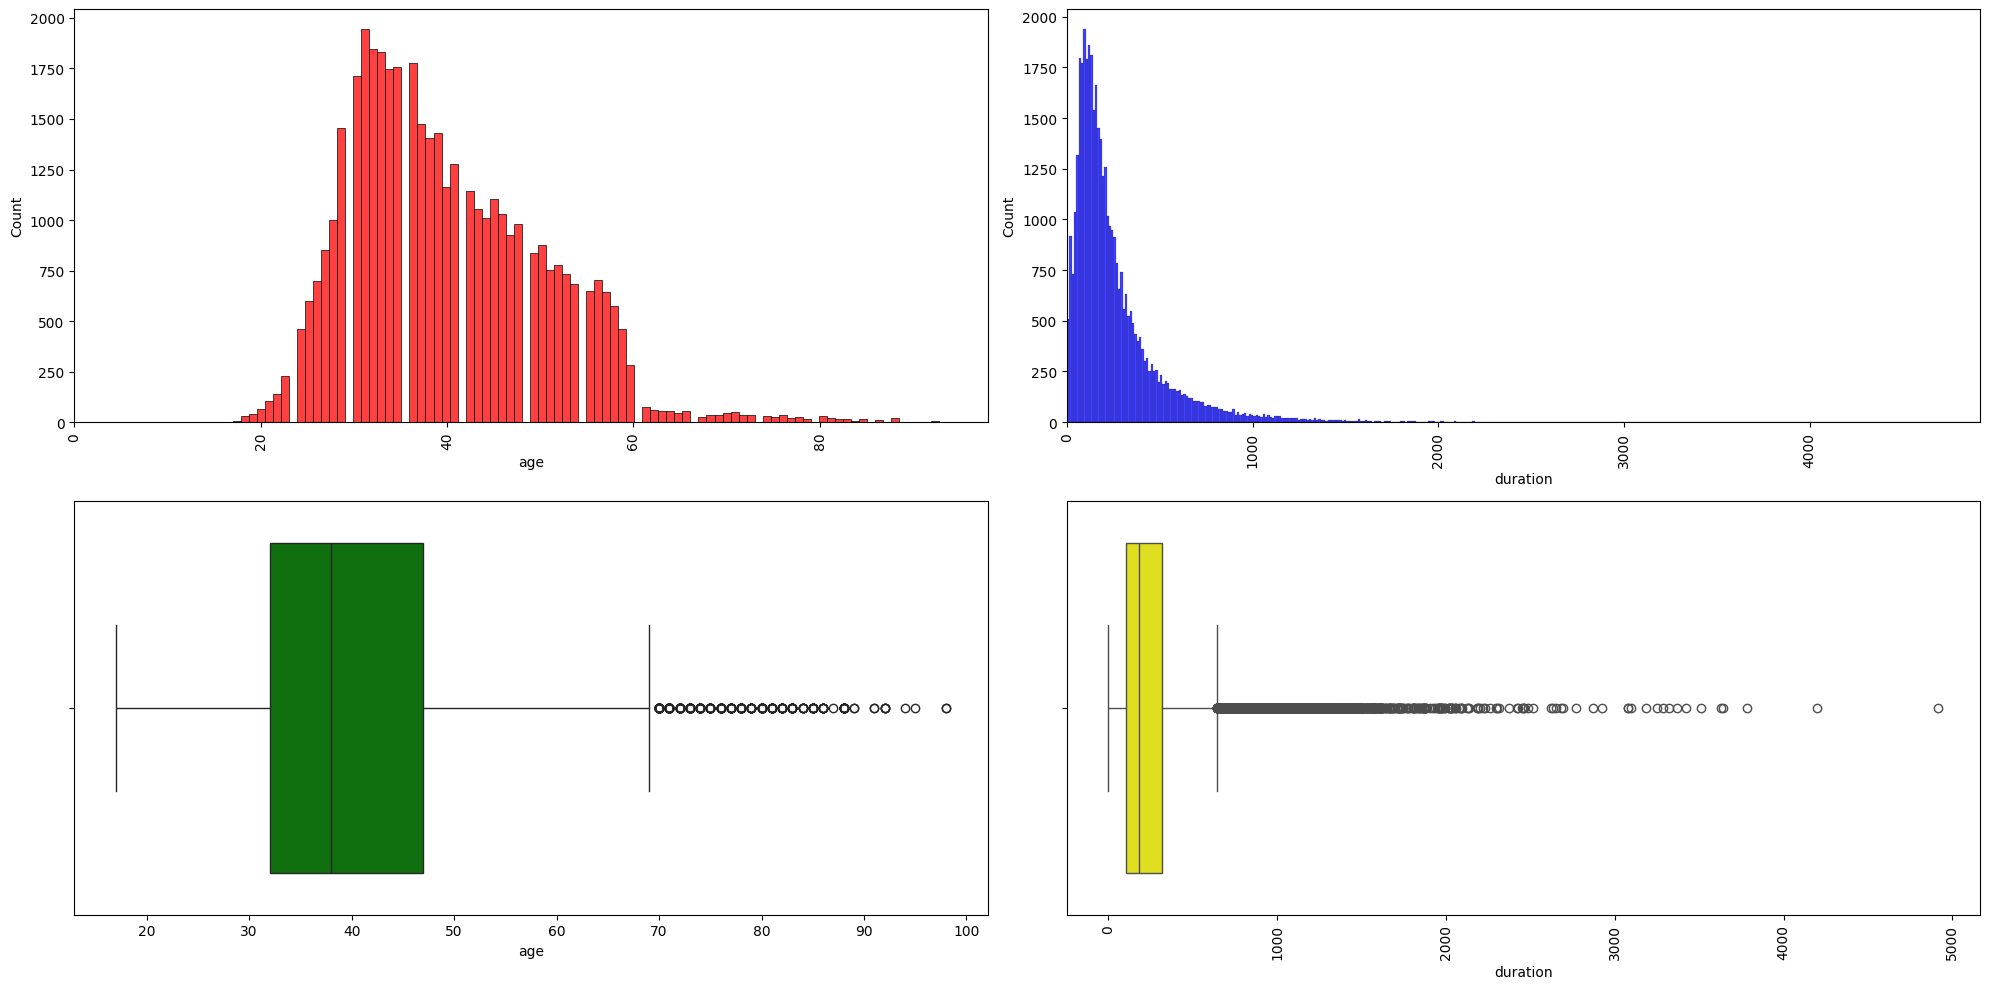

/tmp/ipykernel_72049/2511921621.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


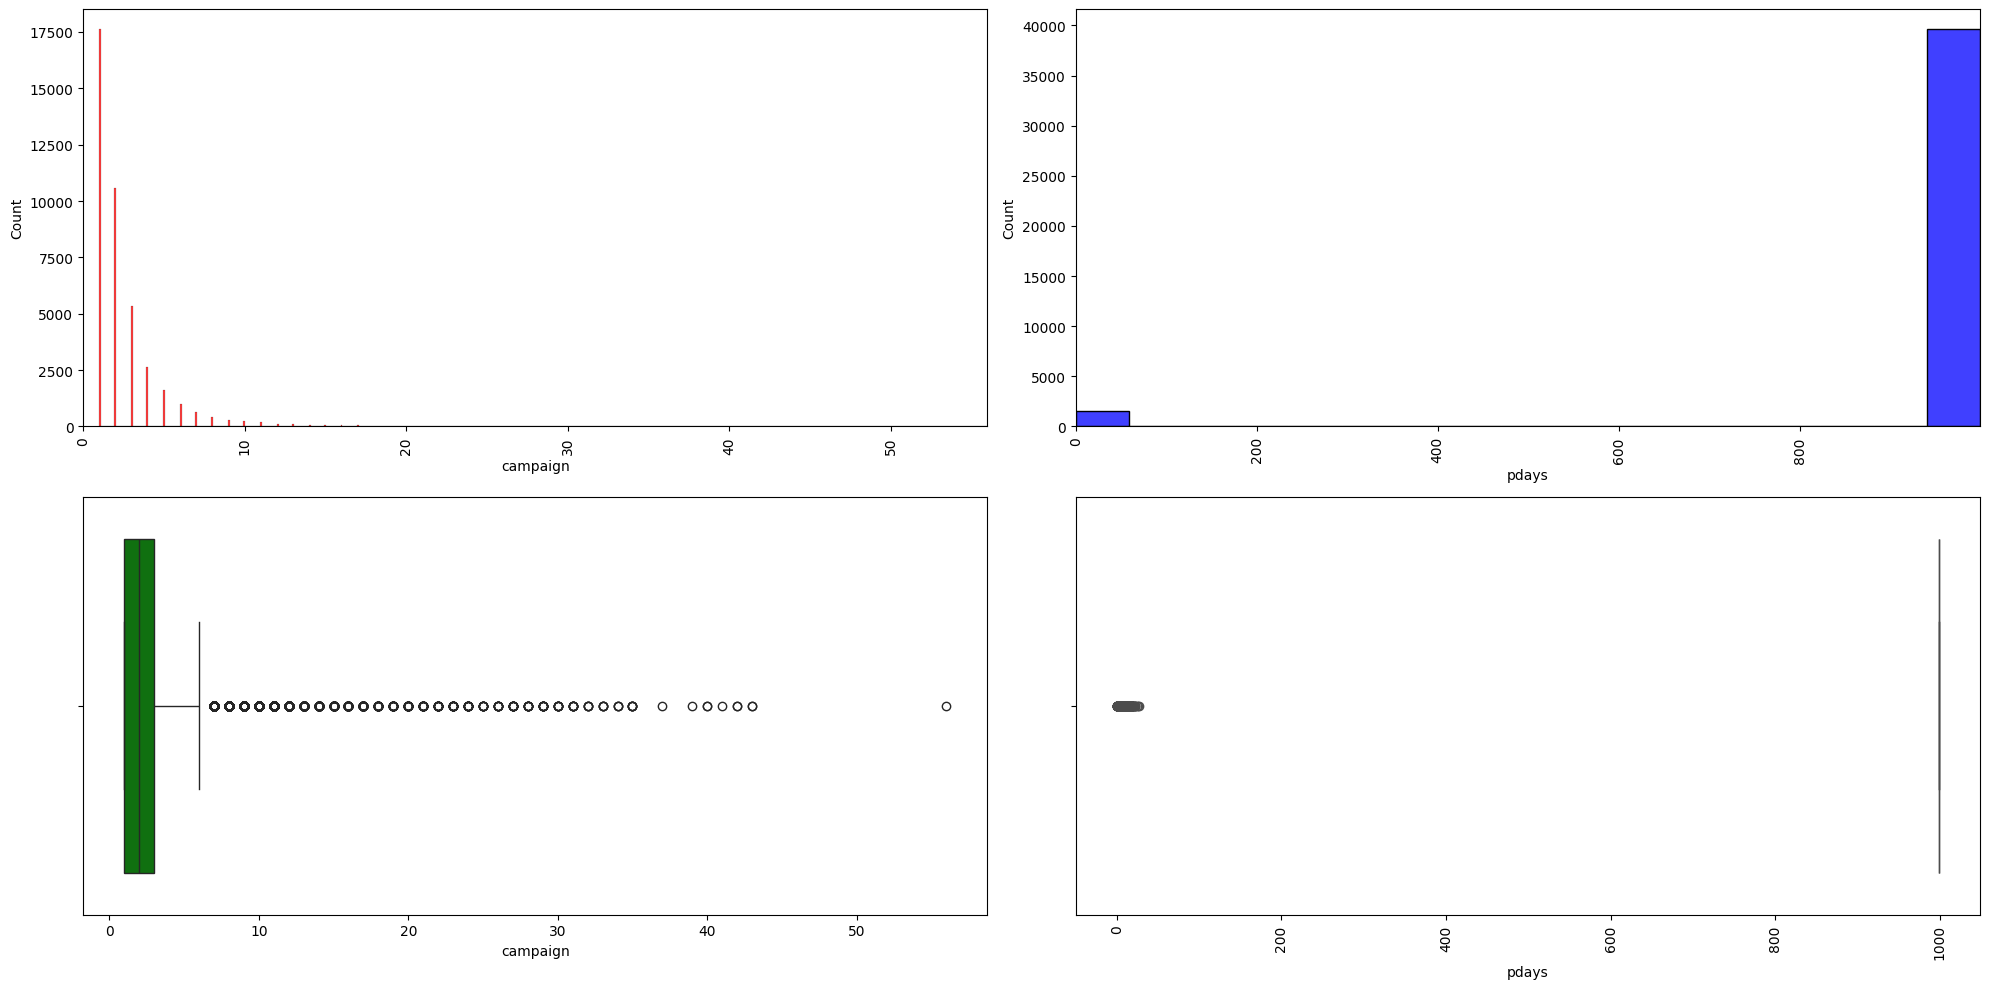

/tmp/ipykernel_72049/2511921621.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


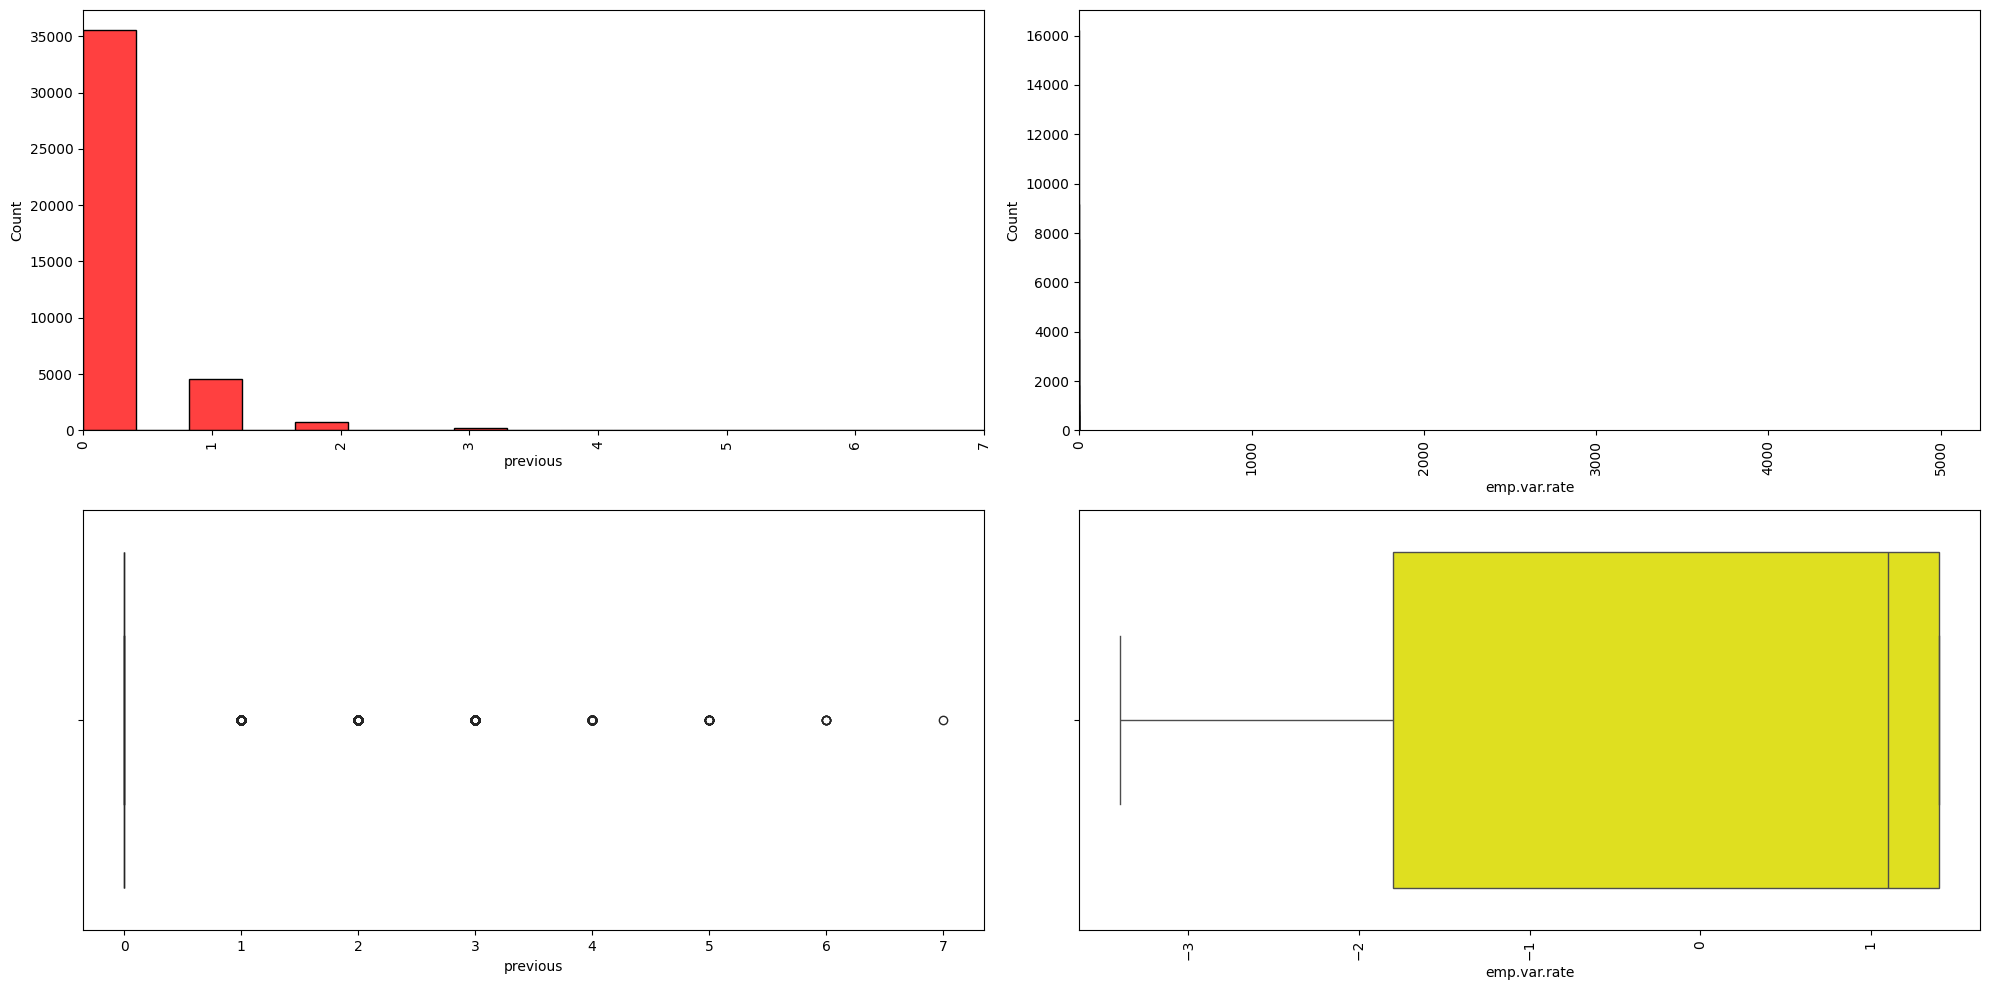

/tmp/ipykernel_72049/2511921621.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_72049/2511921621.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


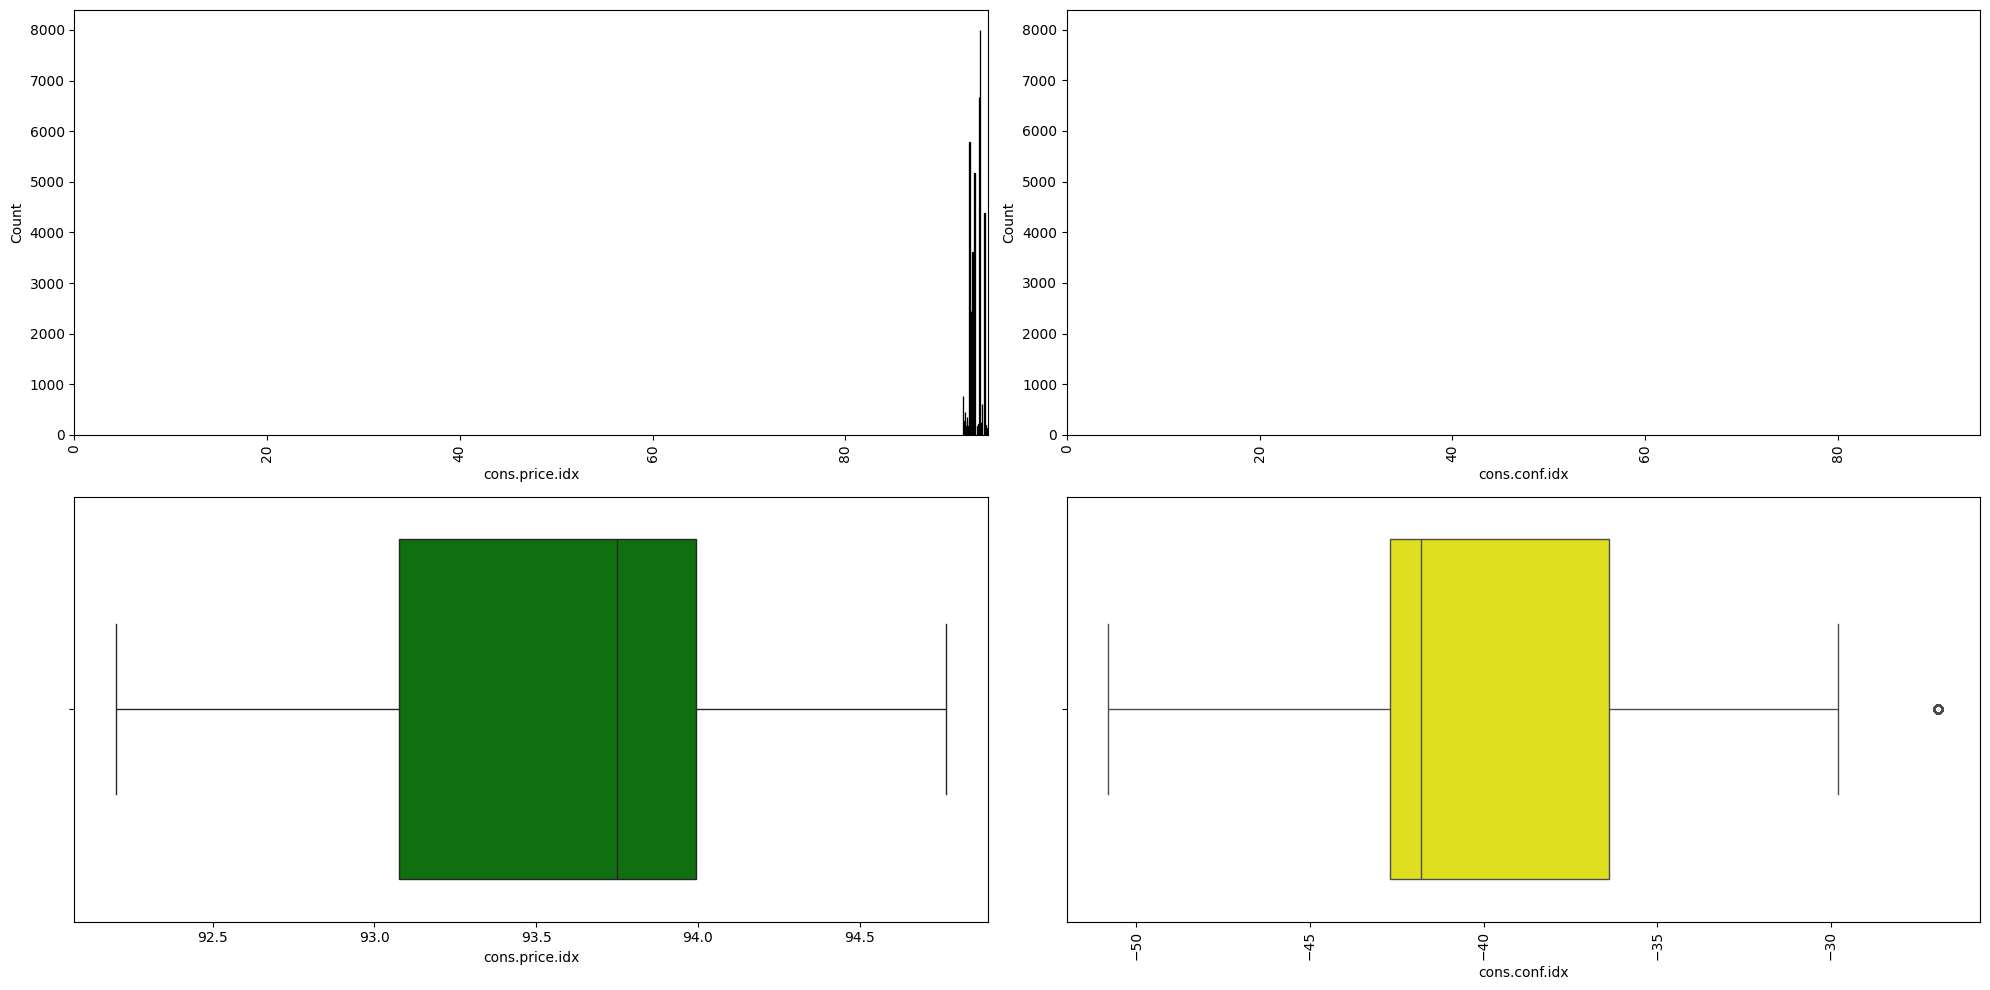

In [20]:
#2.2) VARIABLES UNIVARIADAS NUMERICAS. Gráficos.
#1grupo: 'age' 'duration' 
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


sns.histplot(ax= axs[0,0], data=df_rd, x='age', color="red").set_xlim(0, maxage)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,0], data=df_rd, x='age',color="green")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

########

sns.histplot(ax= axs[0,1], data=df_rd, x='duration',color="blue").set_xlim(0, maxdur)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,1], data=df_rd, x='duration',color="yellow")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#2grupo 'campaign' 'pdays'
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


sns.histplot(ax= axs[0,0], data=df_rd, x='campaign', color="red").set_xlim(0, maxcam)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,0], data=df_rd, x='campaign',color="green")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

########

sns.histplot(ax= axs[0,1], data=df_rd, x='pdays',color="blue").set_xlim(0, maxpday)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,1], data=df_rd, x='pdays',color="yellow")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#3grupo 'previous' 'emp.var.rate'
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


sns.histplot(ax= axs[0,0], data=df_rd, x='previous', color="red").set_xlim(0, maxprev)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,0], data=df_rd, x='previous',color="green")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

########

sns.histplot(ax= axs[0,1], data=df_rd, x='emp.var.rate',color="blue").set_xlim(0, maxemp)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,1], data=df_rd, x='emp.var.rate',color="yellow")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#4grupo 'cons.price.idx' 'cons.conf.idx'
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


sns.histplot(ax= axs[0,0], data=df_rd, x='cons.price.idx', color="red").set_xlim(0, maxconspr)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,0], data=df_rd, x='cons.price.idx',color="green")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

########

sns.histplot(ax= axs[0,1], data=df_rd, x='cons.conf.idx',color="blue").set_xlim(0, maxconspr)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,1], data=df_rd, x='cons.conf.idx',color="yellow")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


2.2)CONCLUSIONES ANÁLISIS UNIVARIABLE. VARIABLES NUMÉRICAS:
